## Welcome to Deep Learning!
Using Keras and Tensorflow you'll learn how to:


*   create a fully-connected neural network architecture
*   apply neural nets to two classic ML problems: regression and classification
* train neural nets with stochastic gradient descent, and
improve performance with dropout, batch normalization, and other techniques



## 1. A Single Neuron


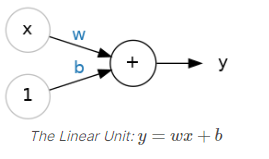

Example - The Linear Unit as a Model


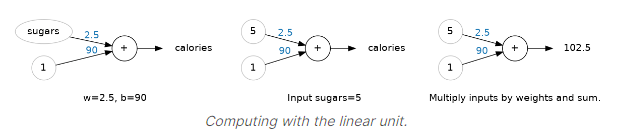

Multiple Inputs

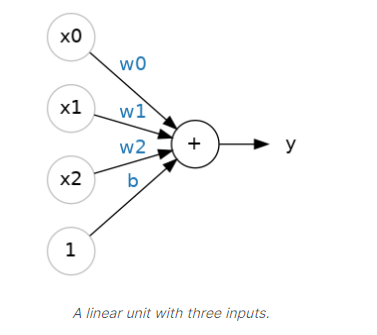

image.png

Linear Units in Keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

Define a linear model for the Red Wine Quality dataset.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 


In [ ]:
import pandas as pd

red_wine = pd.read_csv('/content/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.shape # (rows, columns)

(1599, 12)

In [ ]:
input_shape = [len(red_wine.columns)-1]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1,input_shape=input_shape)
])


In [ ]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))


Weights
<tf.Variable 'dense_1/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.68512684],
       [-0.4027708 ],
       [ 0.31987303],
       [ 0.49401218],
       [ 0.01089358],
       [-0.6146978 ],
       [-0.00124538],
       [-0.5947323 ],
       [ 0.25805402],
       [ 0.6461219 ],
       [ 0.24753737]], dtype=float32)>

Bias
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 2. Deep Neural Networks


Layers

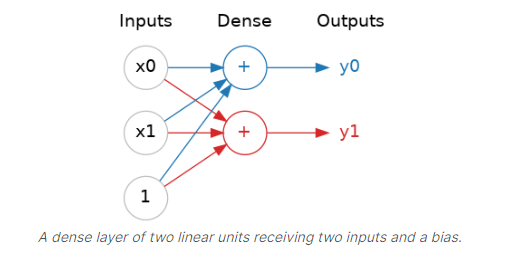

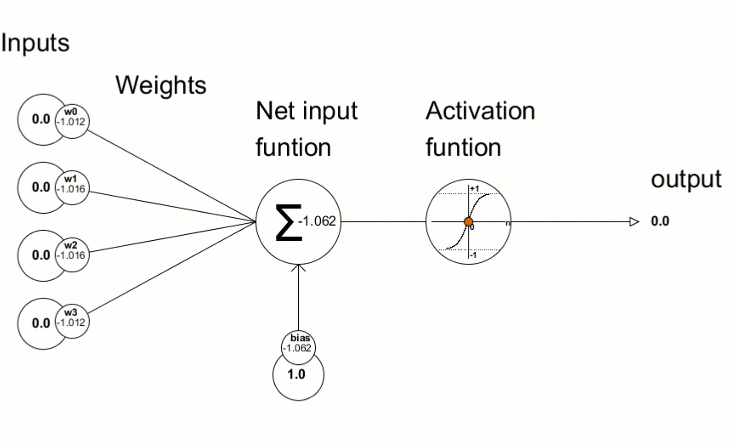

The Activation Function


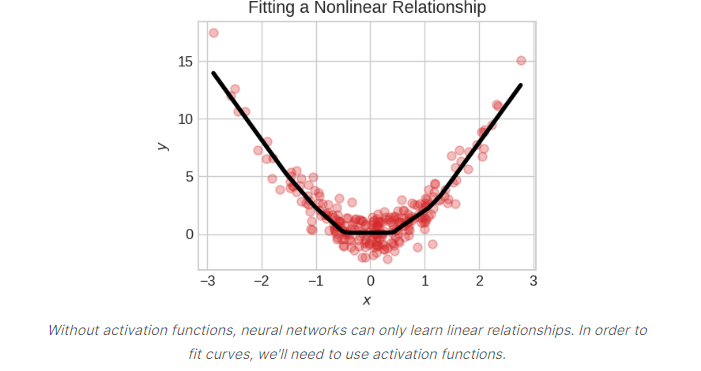

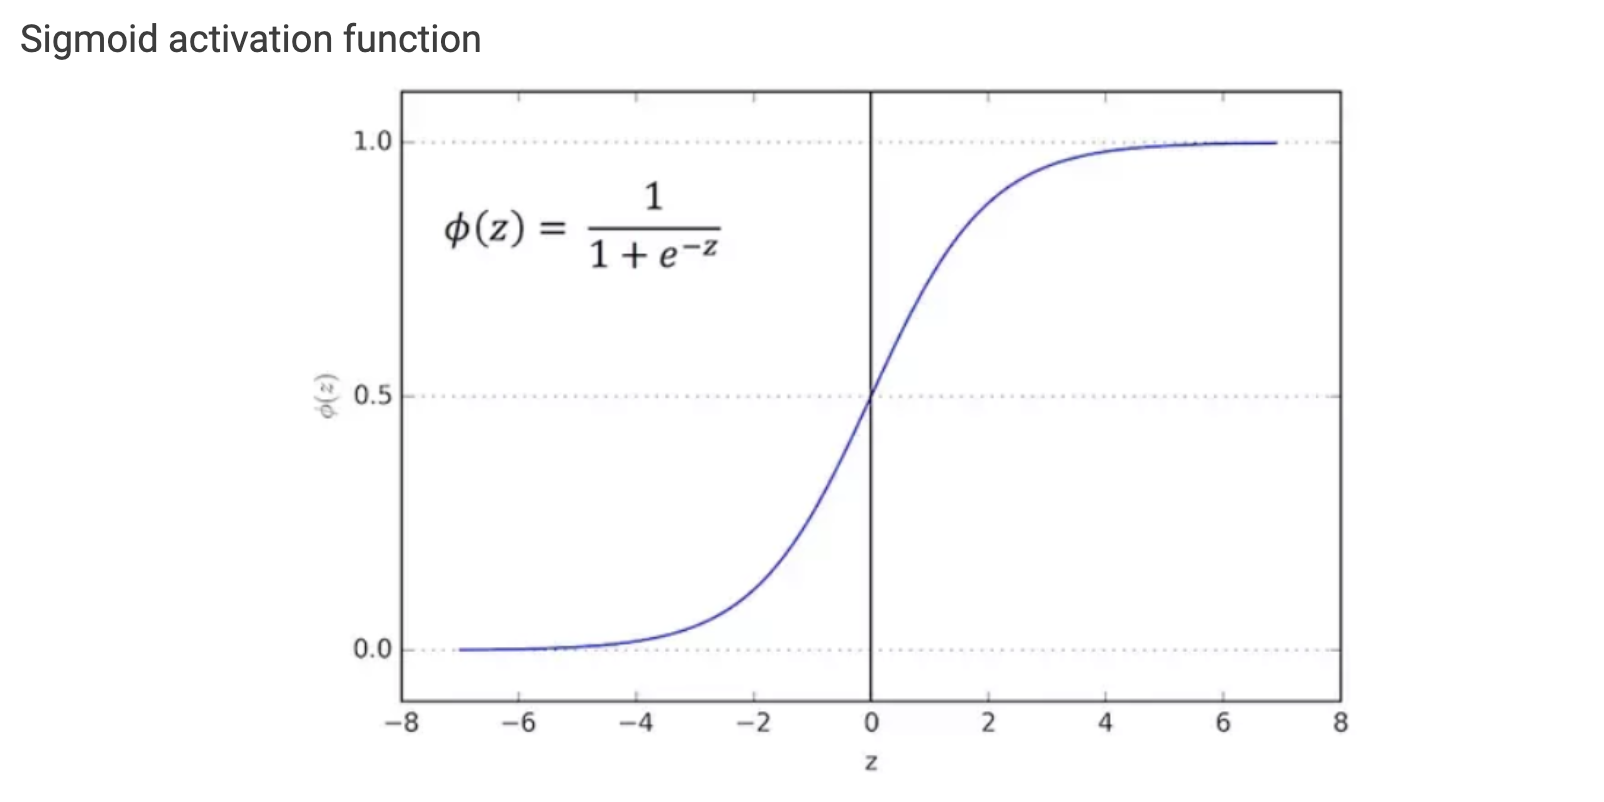

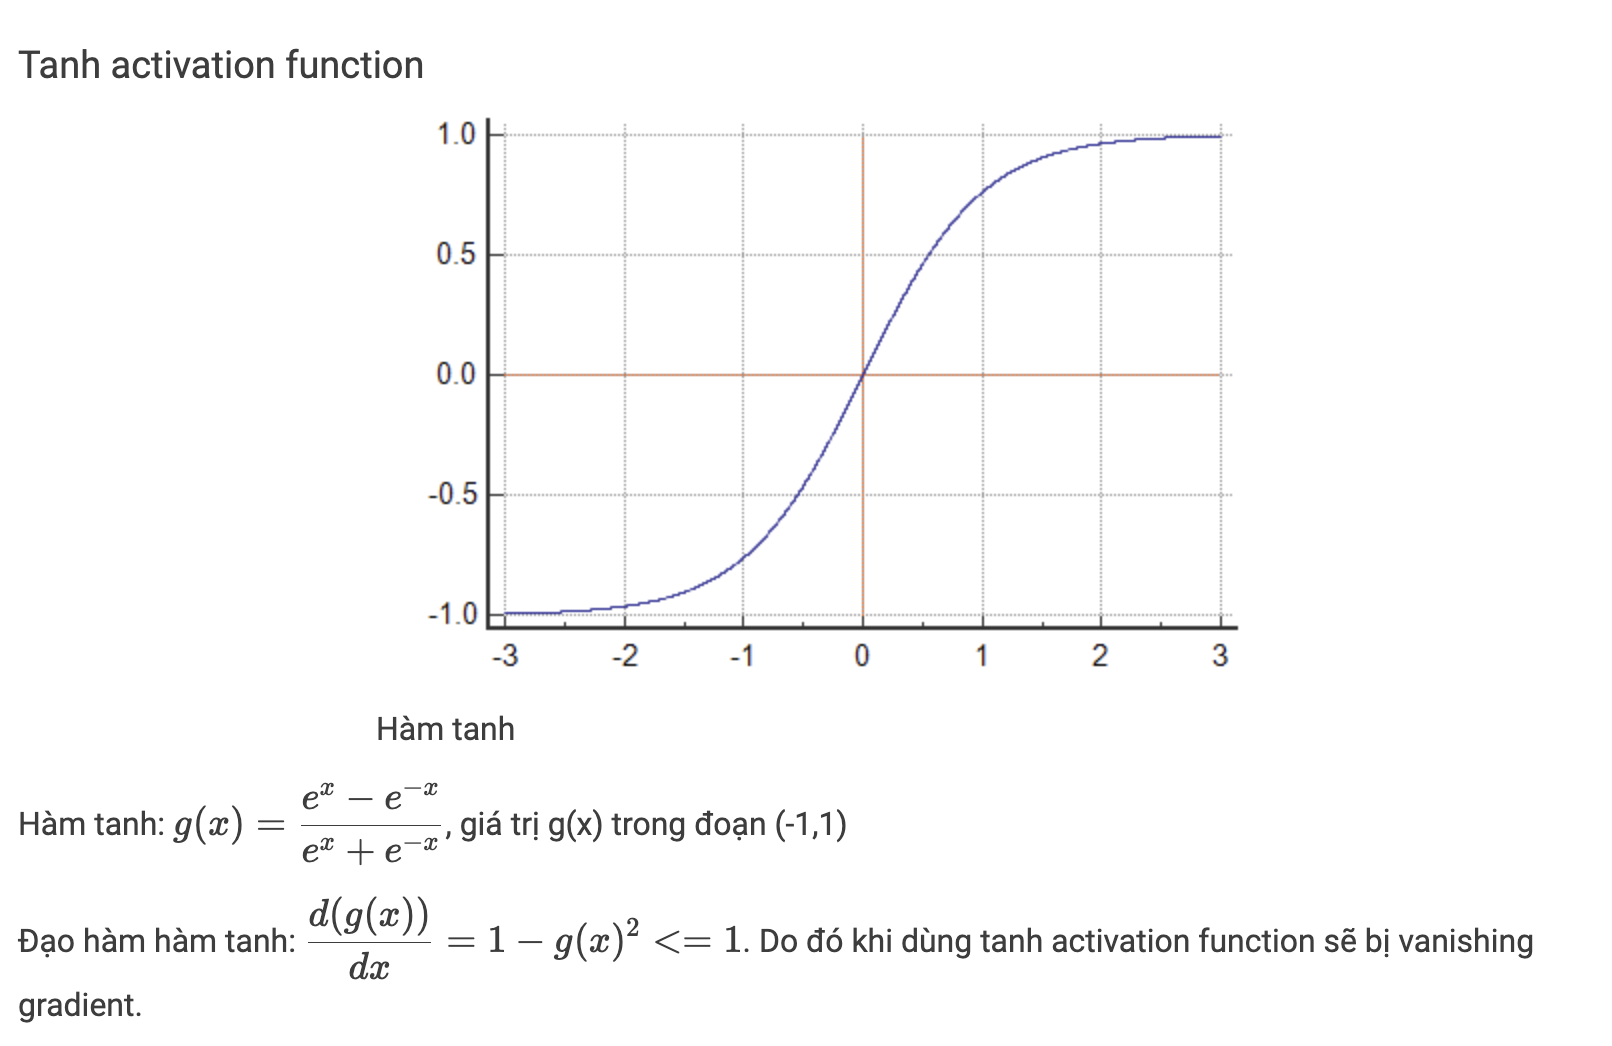

* Nếu các hệ số W và D đều nhỏ hơn 1 thì khi tính gradient ở các layer đầu ta sẽ phải nhân tích của rất nhiều số nhỏ hơn 1 nên giá trị sẽ tiến dần về 0 và bước cập nhật hệ số trong gradient descent trở nên vô nghĩa và các hệ số neural network sẽ không học được nữa. => Vanishing gradient
* Nếu các hệ số W và D đều lớn hơn 1 thì khi tính gradient ở các layer đầu ta sẽ phải nhân tích của rất nhiều số lớn hơn 1 nên giá trị sẽ tiến dần về vô cùng và bước cập nhật hệ số trong gradient descent trở nên không chính xác và các hệ số neural network sẽ không học được nữa. => Exploding gradient


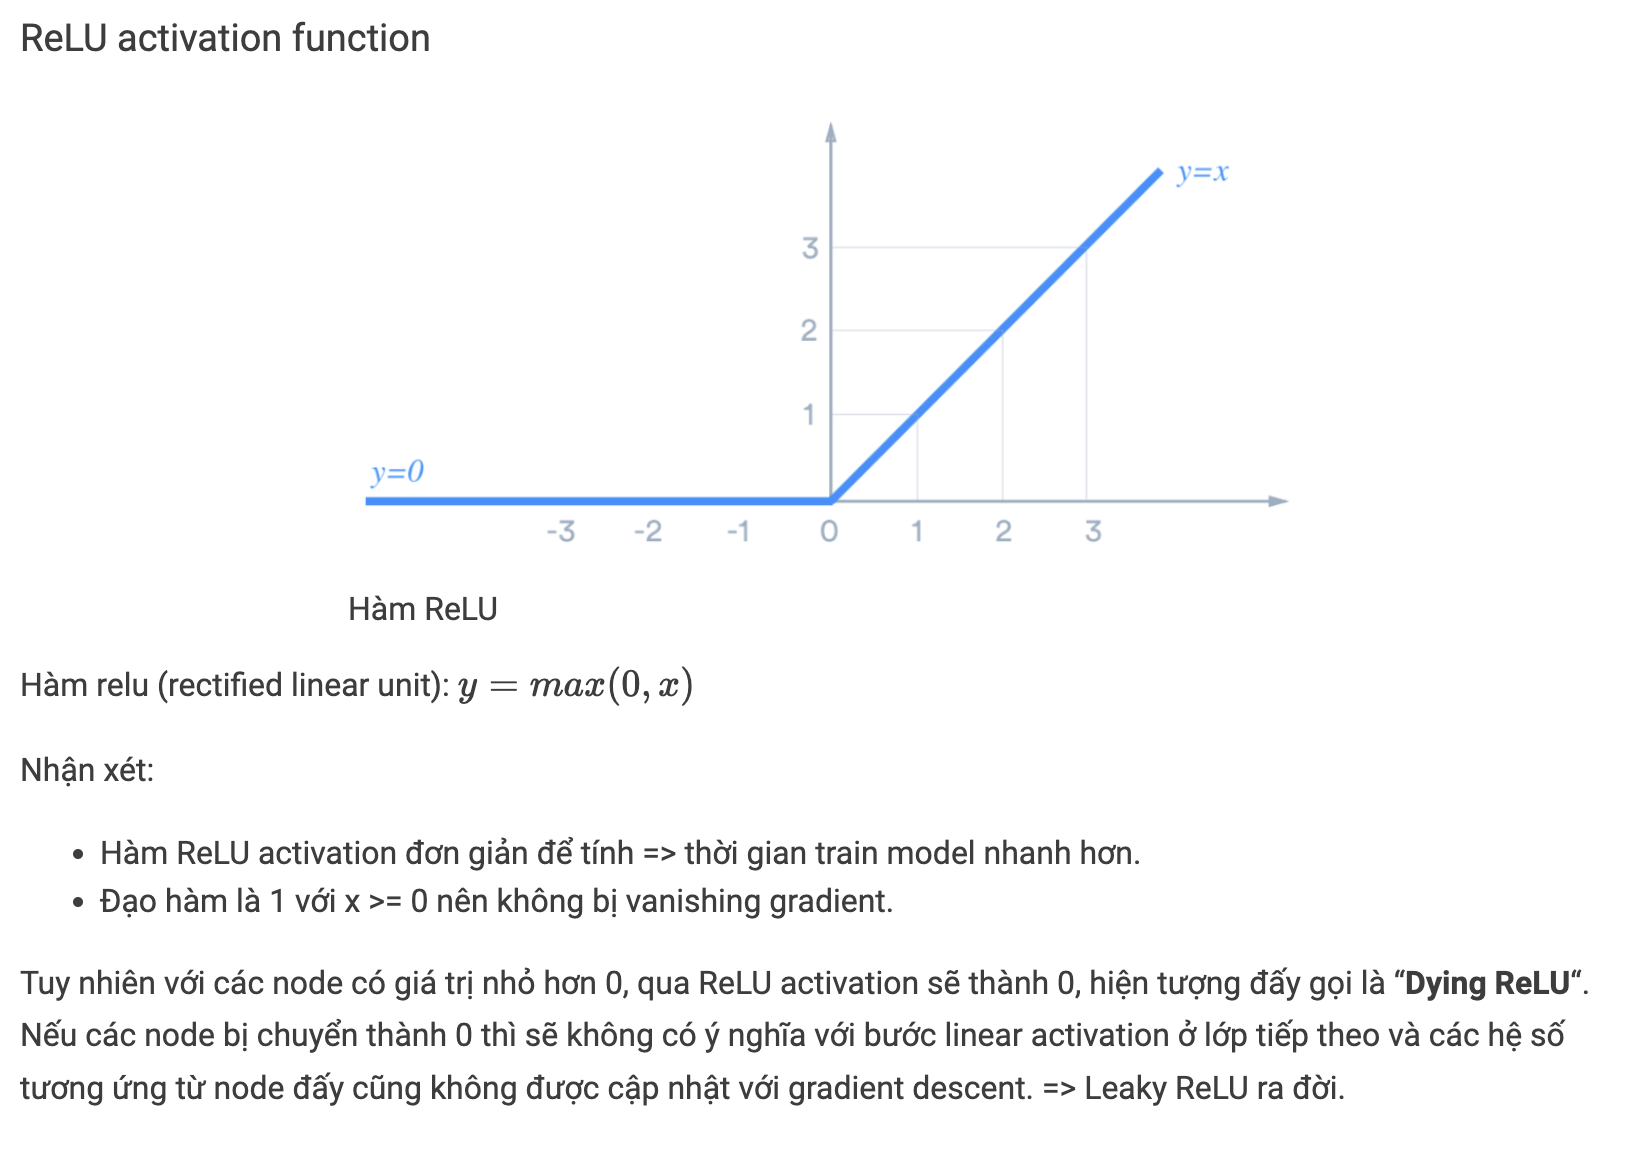

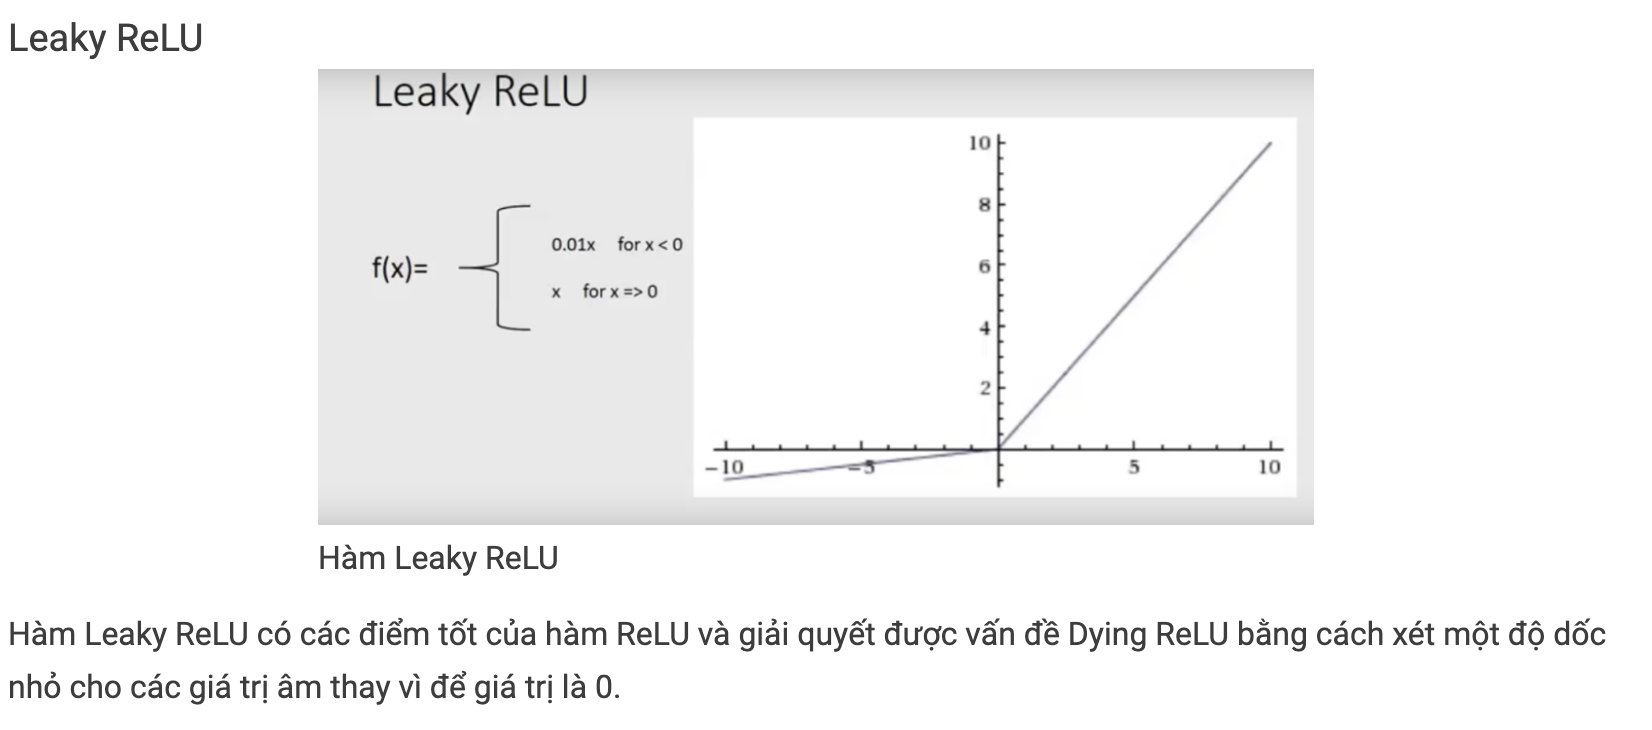

Stacking Dense Layers


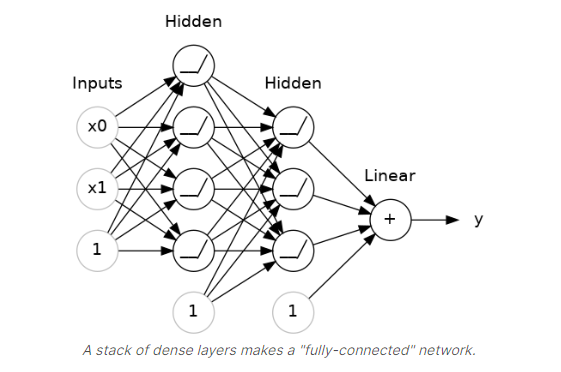

Building Sequential Models


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

## 3. Stochastic Gradient Descent


Gradient Descent

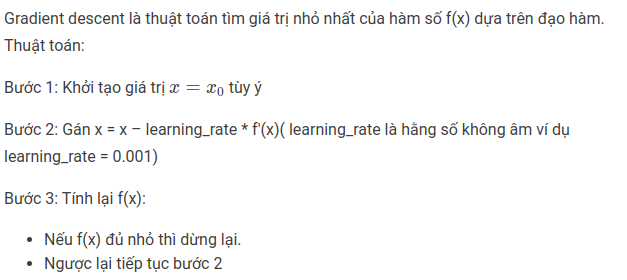

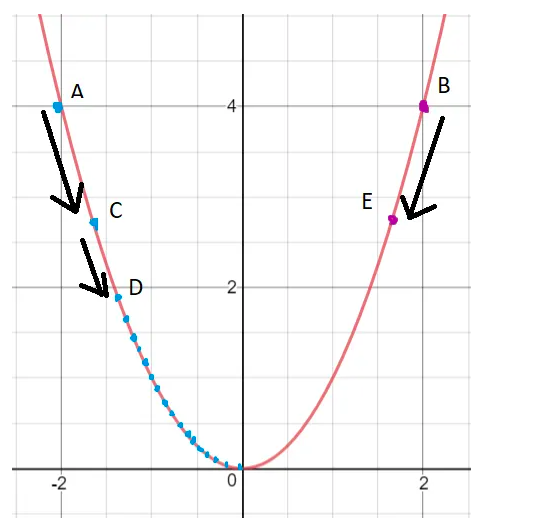



*   Batch gradient descent: Dùng tất cả dữ liệu trong training set cho mỗi lần thực hiện bước tính đạo hàm.

*   Mini-batch gradient descent:Dùng một phần dữ liệu trong training set cho mỗi lần thực hiện bước tính đạo hàm.
* Stochastic gradient descent:Chỉ dùng một dữ liệu trong training set cho mỗi lần thực hiện bước tính đạo hàm và cập nhật.




The Loss Function


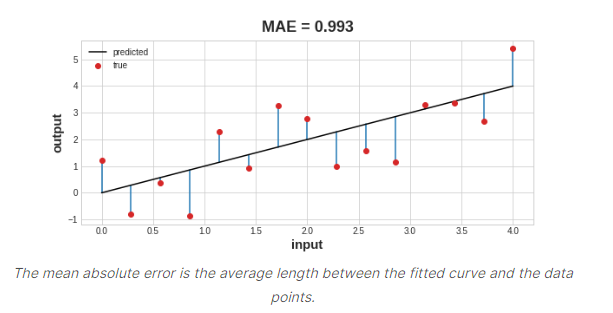

The Optimizer - Stochastic Gradient Descent

 One step of training goes like this:


1.   Sample some training data and run it through the network to make predictions.
2.   Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.



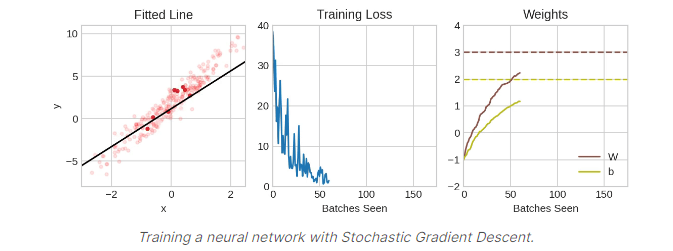

Adding the Loss and Optimizer

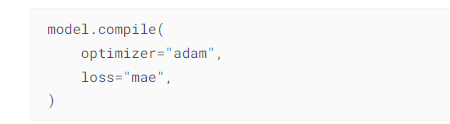

Example - Red Wine Quality


In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
print(X_train.shape)


(1119, 11)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 71ms/step - loss: 0.2899 - val_loss: 0.1418
Epoch 2/10
5/5 [==============================] - 0s 35ms/step - loss: 0.1520 - val_loss: 0.1315
Epoch 3/10
5/5 [==============================] - 0s 28ms/step - loss: 0.1348 - val_loss: 0.1231
Epoch 4/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1241 - val_loss: 0.1248
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1146 - val_loss: 0.1117
Epoch 6/10
5/5 [==============================] - 0s 28ms/step - loss: 0.1113 - val_loss: 0.1082
Epoch 7/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1074 - val_loss: 0.1068
Epoch 8/10
5/5 [==============================] - 0s 28ms/step - loss: 0.1073 - val_loss: 0.1027
Epoch 9/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1054 - val_loss: 0.1143
Epoch 10/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1068 - val_loss: 0.1028


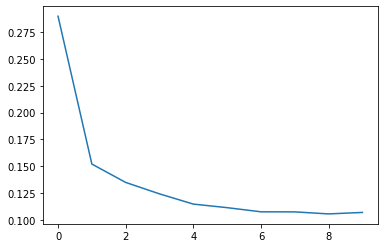

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## 4. Overfitting and Underfitting


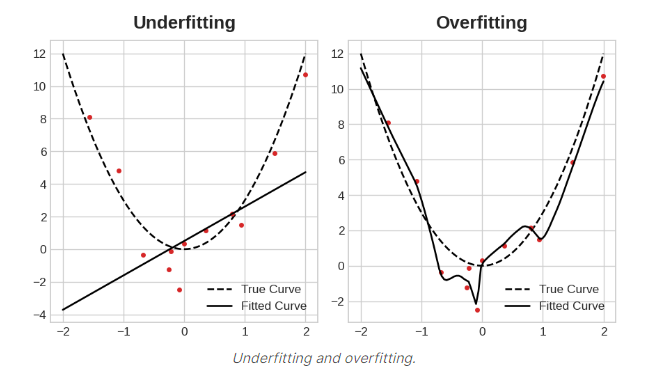



*   Underfitting the training set is when the loss is not as low as it could be because the model hasn't learned enough signal.
*    Overfitting the training set is when the loss is not as low as it could be because the model learned too much noise



Early Stopping


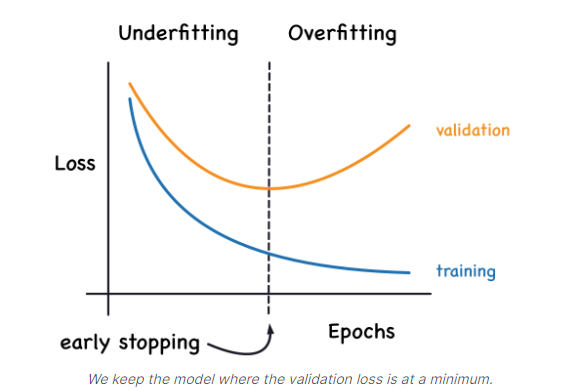

Adding Early Stopping


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Example - Train a Model with Early Stopping

In [ ]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Minimum validation loss: 0.09301844984292984


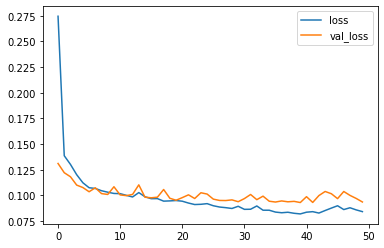

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

## 5. Dropout and Batch Normalization


Dropout với hệ số p nghĩa là trong quá trình train model, với mỗi lần thực hiện cập nhật hệ số trong gradient descent ta ngẫu nhiên loại bỏ p% số lượng node trong layer đấy, hay nói cách khác là dữ lại (1-p%) node. Mỗi layer có thể có các hệ số dropout p khác nhau.

Dropout

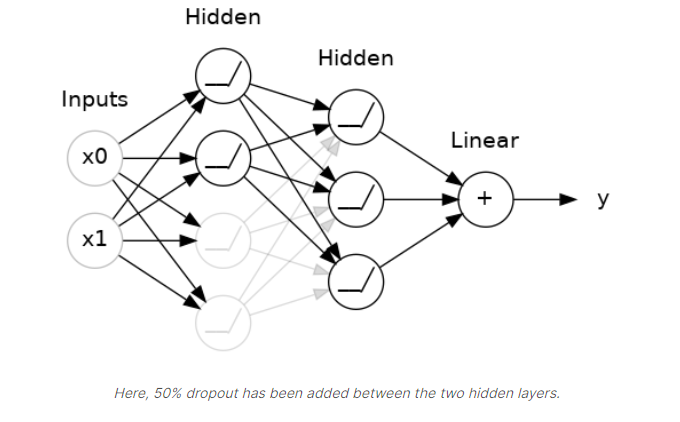

Adding Dropout


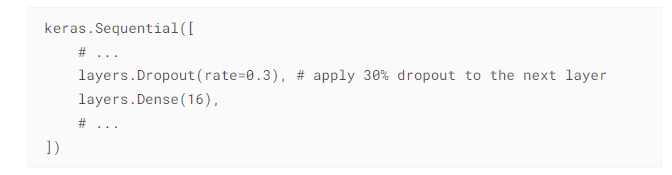

*Batch* Normalization

Batch normalization thực hiện việc chuẩn hóa (normalizing) và zero centering (mean substracting)
dữ liệu trước khi đưa qua hàm activation (giá trị trung bình (mean) sẽ được đưa về 0 và phương sai
(variance) sẽ được đưa về 1)



giúp giải quyết các vấn đề vanishing gradient hay exploding gradient.

**Adding** Batch Normalization






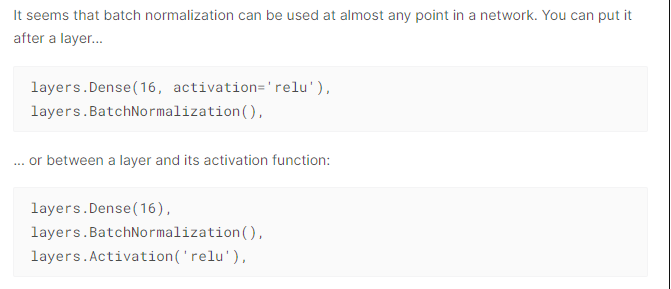

Example - Using Dropout and Batch Normalization


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

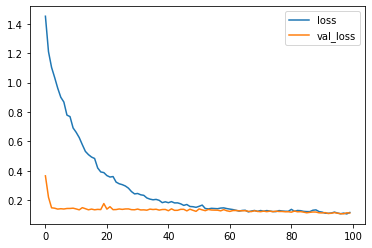

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

##6. Binary Classification


Binary Cross-Entropy Loss


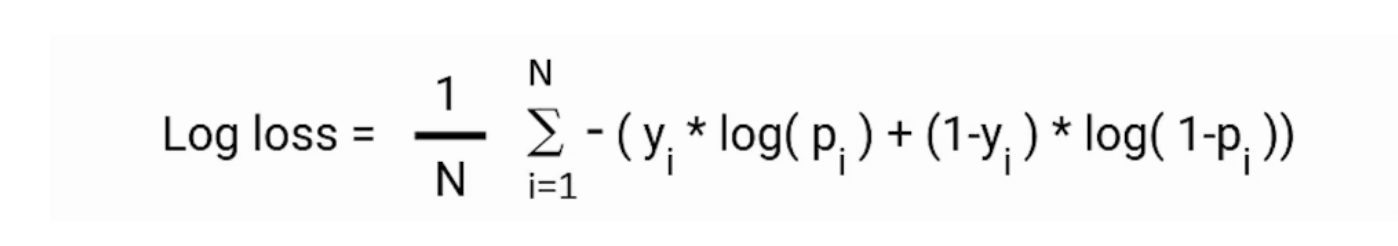

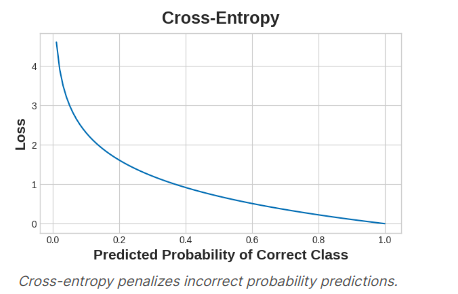

Sigmoid Activation

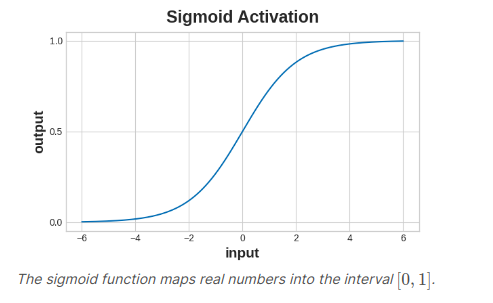

In [ ]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('/content/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[34]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.5672
Best Validation Accuracy: 0.7524


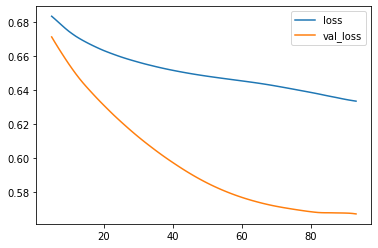

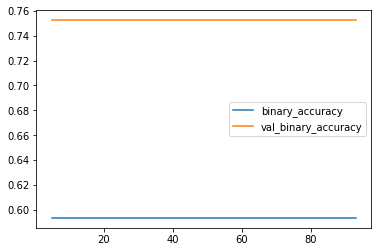

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

## Use a neural network to predict cancellations in hotel reservations with the Hotel Cancellations dataset.

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('/content/hotel.csv')

hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

1. Define Model


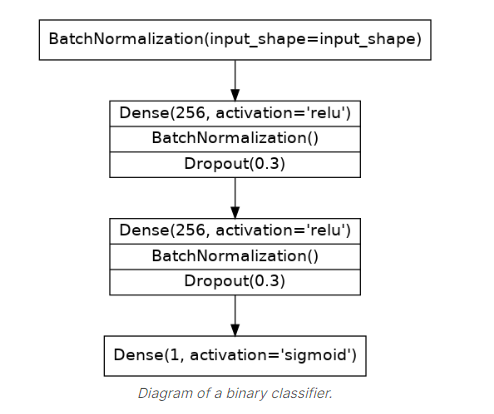

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model =keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(256, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation = "relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation ="sigmoid")
    
])


2. Add Optimizer, Loss, and Metric


In [ ]:
model.compile(
optimizer = "Adam",
loss = "binary_crossentropy",
metrics = ["binary_accuracy"],
)


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)


In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)



Epoch 1/200
175/175 [==============================] - 4s 19ms/step - loss: 0.4737 - binary_accuracy: 0.7743 - val_loss: 0.4312 - val_binary_accuracy: 0.7976
Epoch 2/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4218 - binary_accuracy: 0.8016 - val_loss: 0.3996 - val_binary_accuracy: 0.8140
Epoch 3/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4092 - binary_accuracy: 0.8091 - val_loss: 0.3923 - val_binary_accuracy: 0.8166
Epoch 4/200
175/175 [==============================] - 3s 18ms/step - loss: 0.4005 - binary_accuracy: 0.8129 - val_loss: 0.3884 - val_binary_accuracy: 0.8211
Epoch 5/200
175/175 [==============================] - 3s 18ms/step - loss: 0.3966 - binary_accuracy: 0.8150 - val_loss: 0.3864 - val_binary_accuracy: 0.8241
Epoch 6/200
175/175 [==============================] - 3s 18ms/step - loss: 0.3917 - binary_accuracy: 0.8175 - val_loss: 0.3797 - val_binary_accuracy: 0.8244
Epoch 7/200
175/175 [==============================]

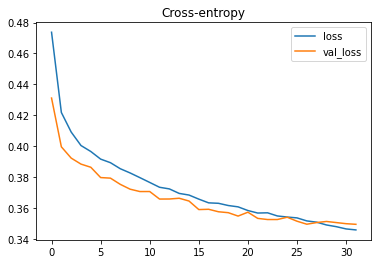

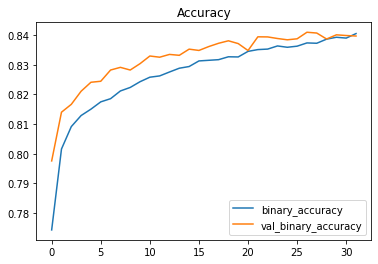

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
Y_new = model.predict(X_valid)

933/933 [==============================] - 2s 2ms/step
